In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline






all stock releated data are in yahoo finance so we import data from there

In [3]:
import yfinance as yf
import datetime as dt
stock="POWERGRID.NS"
start=dt.datetime(2000,1,1)
end=dt.datetime(2025,10,1)
df=yf.download(stock,start,end)

/tmp/ipython-input-2168571789.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.shape

(4435, 5)

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.768656,34.579203,26.258088,28.358105,855215656
2007-10-08,30.142334,32.842354,29.952858,32.842354,126671715
2007-10-09,32.194992,32.479204,28.531805,30.158133,116725709
2007-10-10,32.494987,33.158151,32.210776,33.031833,67931378
2007-10-11,36.126591,37.895026,32.210773,37.895026,106320954


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4435 entries, 2007-10-05 to 2025-09-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4435 non-null   float64
 1   (High, POWERGRID.NS)    4435 non-null   float64
 2   (Low, POWERGRID.NS)     4435 non-null   float64
 3   (Open, POWERGRID.NS)    4435 non-null   float64
 4   (Volume, POWERGRID.NS)  4435 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.9 KB


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4435.000000,4435.000000,4435.000000,4435.000000,4.435000e+03
mean,89.230174,90.368912,88.113605,89.274687,1.192548e+07
std,77.990296,78.884377,77.084190,77.998140,2.013400e+07
min,18.548220,19.827407,16.629439,19.731467,0.000000e+00
25%,36.011663,36.582474,35.546756,36.056448,4.935334e+06
50%,65.565903,66.432004,64.497116,65.432133,8.544753e+06
75%,98.485218,99.994013,96.907136,98.247685,1.378587e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


data is clean there is no null value present in our dataset

In [9]:
df=df.reset_index()

In [10]:
df.shape

(4435, 6)

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,31.768656,34.579203,26.258088,28.358105,855215656
1,2007-10-08,30.142334,32.842354,29.952858,32.842354,126671715
2,2007-10-09,32.194992,32.479204,28.531805,30.158133,116725709
3,2007-10-10,32.494987,33.158151,32.210776,33.031833,67931378
4,2007-10-11,36.126591,37.895026,32.210773,37.895026,106320954


In [12]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

A candlestick plot is a very common way to visualize stock price movements (Open, High, Low, Close) over time. It shows the trend, volatility, and market sentiment in a compact visual format.

In [13]:
df.to_csv("powergrid.csv")
data01=pd.read_csv("powergrid.csv")

In [14]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.76865577697754,34.57920349941544,26.258088295833474,28.358104615538164,855215656
2,1,2007-10-08,30.142333984375,32.84235417158259,29.95285805693583,32.84235417158259,126671715
3,2,2007-10-09,32.19499206542969,32.47920391633825,28.53180520038112,30.15813261471511,116725709
4,3,2007-10-10,32.49498748779297,33.15815119704603,32.21077569331334,33.031833178254736,67931378


green signal is for increasing stock and red signal is for decreasing stock

In [15]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=data01["Date"],open=data01["Open"],
                                   high=data01["High"],low=data01["Low"],
                                   close=data01["Close"]
                                   )])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


green box means there is benfit in buy that stock while green box means there is loss in buy that stock

## Closing price,Open price,Volume  trend over time

In [16]:
col=["Close","Open","Volume"]

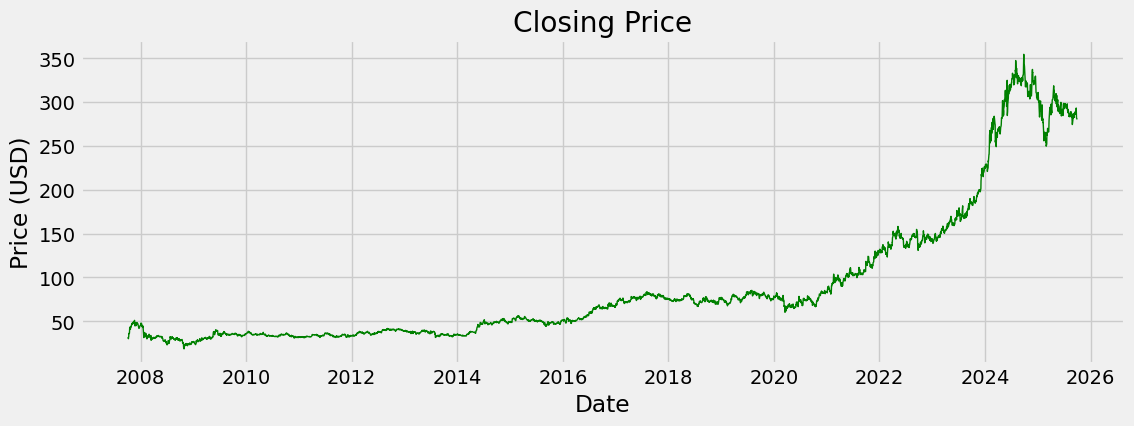

In [17]:

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Close"], color="green", linewidth=1)
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()





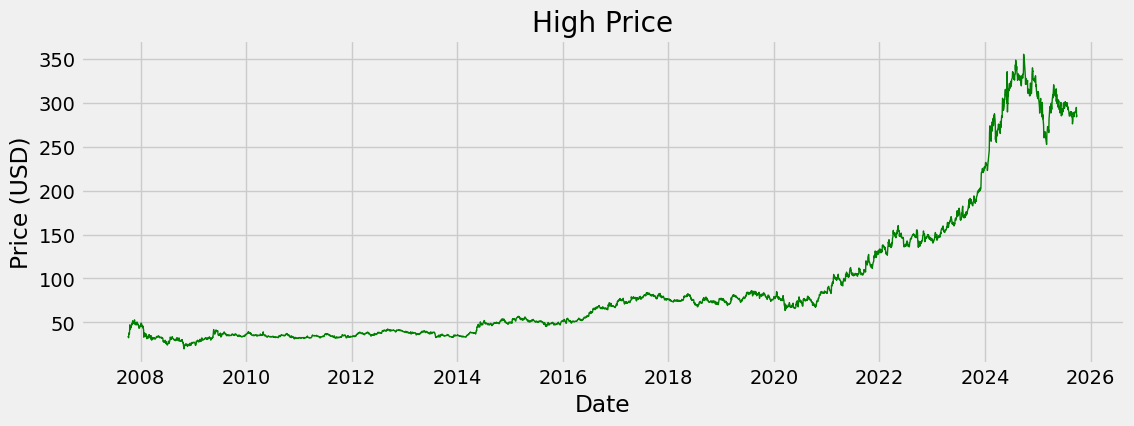

In [18]:

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["High"], color="green", linewidth=1)
plt.title("High Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [19]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,31.768656,34.579203,26.258088,28.358105,855215656
1,2007-10-08,30.142334,32.842354,29.952858,32.842354,126671715
2,2007-10-09,32.194992,32.479204,28.531805,30.158133,116725709
3,2007-10-10,32.494987,33.158151,32.210776,33.031833,67931378
4,2007-10-11,36.126591,37.895026,32.210773,37.895026,106320954


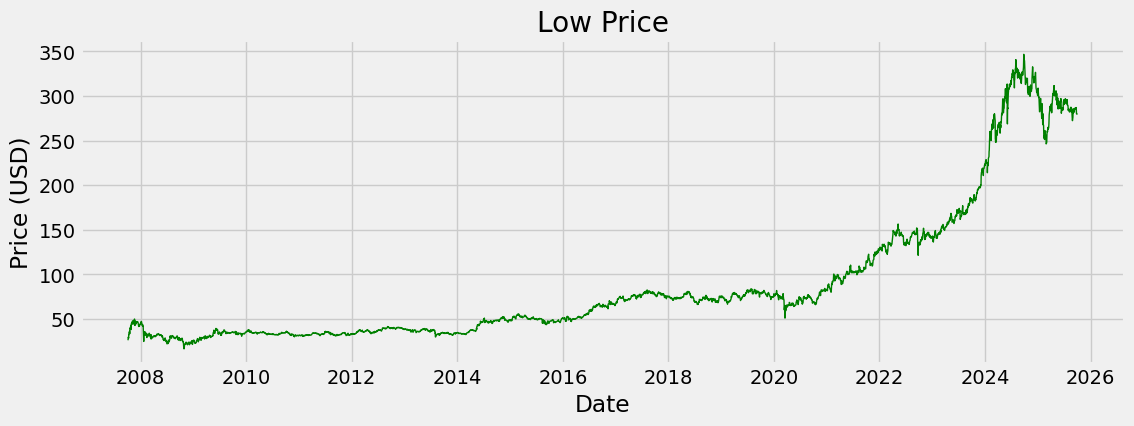

In [20]:

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Low"], color="green", linewidth=1)
plt.title("Low Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


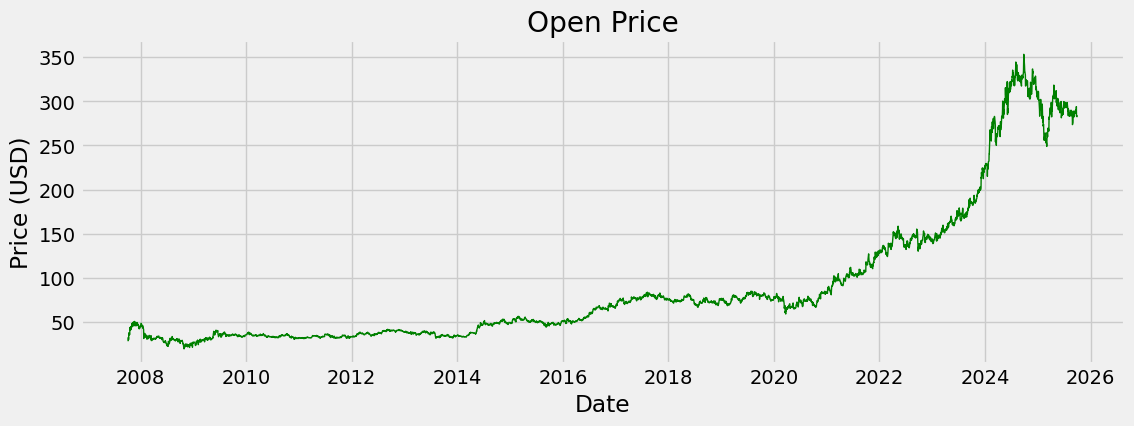

In [21]:

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Open"], color="green", linewidth=1)
plt.title("Open Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


from all this graph we can say that from starting of 2024 till there is global increase in price for every column low,closing,high,open

## Simple Moving Average and Exponential Moving Average

In [22]:
sma200=df["Close"].rolling(200).mean()

In [23]:
sma100=df["Close"].rolling(100).mean()

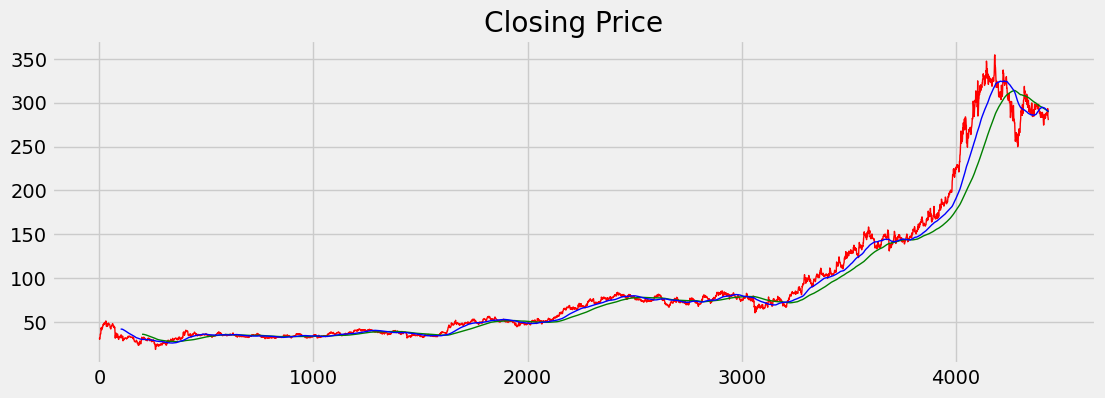

In [28]:
plt.figure(figsize=(12,4))
plt.plot( df["Close"],label=f'{stock}closing_price',color="red", linewidth=1)
plt.plot(sma200,label=f'{stock}closing_price',color="green",linewidth=1)
plt.plot(sma100,label=f'{stock}closing_price',color="blue",linewidth=1)
plt.title("Closing Price")

plt.show()

## ema


In [30]:
ema100=df["Close"].ewm(span=100,adjust=False).mean()

In [34]:
ema200=df["Close"].ewm(span=200,adjust=False).mean()

Text(0.5, 1.0, 'Closing Price vs ema ')

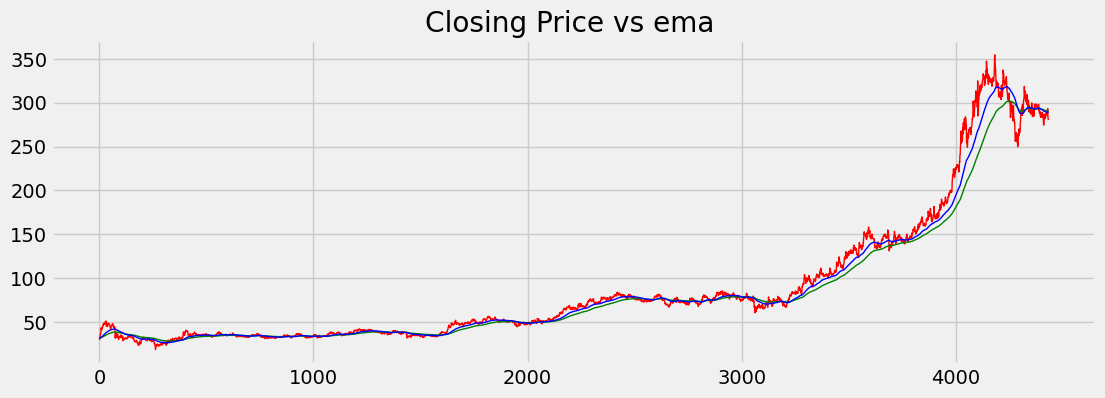

In [35]:
plt.figure(figsize=(12,4))
plt.plot( df["Close"],label="closing_price",color="red", linewidth=1)
plt.plot(ema200,label="ema_of_200",color="green",linewidth=1)
plt.plot(ema100,label="ema_of_100",color="blue",linewidth=1)
plt.title("Closing Price vs ema ")

## Traning and Testing Data

In [39]:
data_training=pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

In [40]:
data_training.shape

(3104, 1)

In [41]:
data_testing.shape

(1331, 1)

before apply model it is very necessary to scale all value are in one range

## Feature Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler(feature_range=(0,1))
training_scaled=min.fit_transform(data_training)


In [44]:
training_scaled

array([[0.19808592],
       [0.17371823],
       [0.20447385],
       ...,
       [0.69010876],
       [0.71235132],
       [0.71485765]])

In [46]:
training_scaled.shape

(3104, 1)

In [47]:
## now lets make x train and y_train data


In [48]:
x_train=[]
y_train=[]
for i in range (100,training_scaled.shape[0]):
  x_train.append(training_scaled[i-100:i])
  y_train.append(training_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [49]:
x_train.shape

(3004, 100, 1)

## MODEL BUILDING

In [51]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [52]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))






/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)